# Transporte Público en CDMX
Este notebook se realiza con la intención de documentar el proceso de análisis de la base de datos de transporte público que comparte el INEGI.
Algunos de los datos de esta base incluyen: número de usuarios, kilómetros recorridos, pasajeros que viajaron con descuento, número de rutas, etc.
Esto para transporte en todo el país, desde Monterrey hasta Qro y la zona del Valle de México y la información está dividida por mes desde el año 1986
hasta Abril de 2023.

En este análisis nos centraremos en evaluar los distintos medios con los que se cuenta dentro de la CDMX.
## Paquetes
Comenzaremos instalando los paquetes necesarios para el análisis:
* tidyverse
* scales
* ggthemes

In [13]:
library(tidyverse)
library(ggthemes)
library(extrafont)
library(scales)

## Carga de datos
Posteriormente, cargamos la base de datos. Hay que mencionar que la base incluye diccionarios (tc_entidad y tc_municipio) para saber que ID corresponde a la Entidad y Municipio. Ya que sólo analizaremos lo correspondiente a CDMX (ID=9) y la base de datos no entra a detalle con las delegaciones correspondientes, no necesitaremos estos diccionarios. 
Sin embargo, en caso de que se quieran analizar diferentes transporte de otros estados sería posible incluir estos diccionarios en la base principal con un LEFT JOIN.

In [14]:
data <- read.csv("./DATA/etup_mensual_tr_cifra_1986_2023.csv")

## Exploración
Usamos el siguiente código para explorar un poco la base de datos, esto nos muestra las columnas así como las filas que contiene TODA nuestra base:

```head(data)```

Una vez que estamos más familiarizados podemos filtrar solo los transportes de la CDMX (ID=9) y agrupar las variables por medio de transporte para explorar un poco la información disponible para cada medio de transporte. Podemos observar que una de las variables disponibles para todos los medios de transporte es "Pasajeros transportados" por lo que valdría la pena analizar esta variable primero.

In [15]:
data%>%
    filter(ID_ENTIDAD==9)%>%
    group_by(TRANSPORTE) %>%
    distinct(VARIABLE) %>%
    View()

TRANSPORTE,VARIABLE
<chr>,<chr>
Red de Transporte de Pasajeros,Autobuses en operación de lunes a viernes
Red de Transporte de Pasajeros,Autobuses en operación de sábado a domingo
Red de Transporte de Pasajeros,Kilómetros recorridos
Red de Transporte de Pasajeros,Pasajeros transportados
Red de Transporte de Pasajeros,Personal ocupado
Red de Transporte de Pasajeros,Rutas
Sistema de Transporte Colectivo Metro,Energía eléctrica consumida
Sistema de Transporte Colectivo Metro,Kilómetros recorridos
Sistema de Transporte Colectivo Metro,Longitud de servicio


## Limpieza de datos
Antes de comenzar con la gráfica de pasajeros transportados para cada transporte vamos a hacer algunas limpiezas que nos ayuden a manejar más fácilmente los datos. 
* Creamos un nuevo dataframe llamado dataCDMX que sólo contenga información correspondiente al ID_ENTIDAD=9
* Unimos las columnas correspondientes al año y mes de la observación
* Creamos columnas que contengan este año-mes y año pero como una fecha
* Finalmente seleccionamos solo las columnas relevantes para nuestro análisis, en este caso el transporte, variable, valor, fecha y año

In [16]:
dataCDMX <- data %>%
    filter(ID_ENTIDAD==9) %>%
    unite(ANIOMES,c(ANIO,ID_MES)) %>%
    mutate(FECHA=ym(ANIOMES),ANIO=year(FECHA))  %>%
    select(TRANSPORTE,VARIABLE,VALOR,FECHA,ANIO)

## Gráficas
### Pasajeros transportados
Comenzaremos con una gráfica que nos muestre la cantidad de pasajeros transportados cada mes durante los últimos 10 años. Filtramos a los últimos 10 años pues algunos medios de transporte llevan poco tiempo en operación, tal como el cablebús que inició operaciones en 2021.


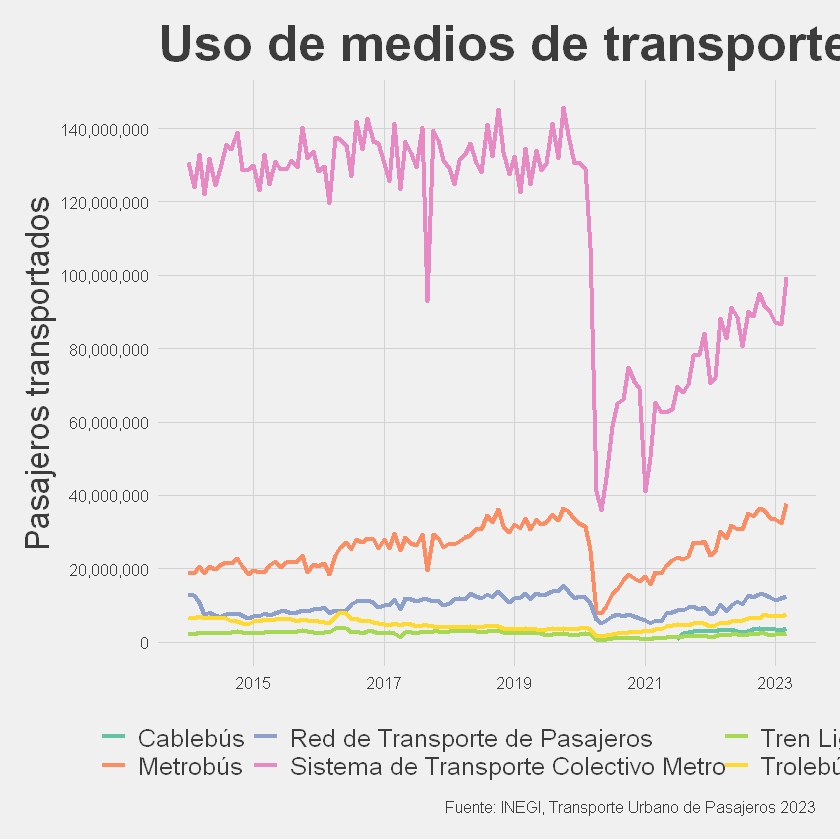

In [17]:
dataCDMX %>%
    filter(VARIABLE=="Pasajeros transportados",ANIO>2023-10)%>%
    ggplot(mapping=aes(x=FECHA,y=VALOR,color=TRANSPORTE))+
    geom_line(size=1.2)+
    labs(title="Uso de medios de transporte en la CDMX",
    caption="Fuente: INEGI, Transporte Urbano de Pasajeros 2023",
    y="Pasajeros transportados",color="") +
    theme_fivethirtyeight() +
    theme(axis.title.y=element_text(size=20),plot.title = element_text(size=30),legend.text = element_text(size=15)) +
    scale_color_brewer(palette="Set2") +
    scale_y_continuous(breaks=seq(0,200000000,by=20000000),labels=comma) +
    scale_x_date(breaks = "2 years",labels =date_format("20%y"))

Podemos ver este mismo análisis en una gráfica de barras 

`summarise()` has grouped output by 'TRANSPORTE'. You can override using the
`.groups` argument.


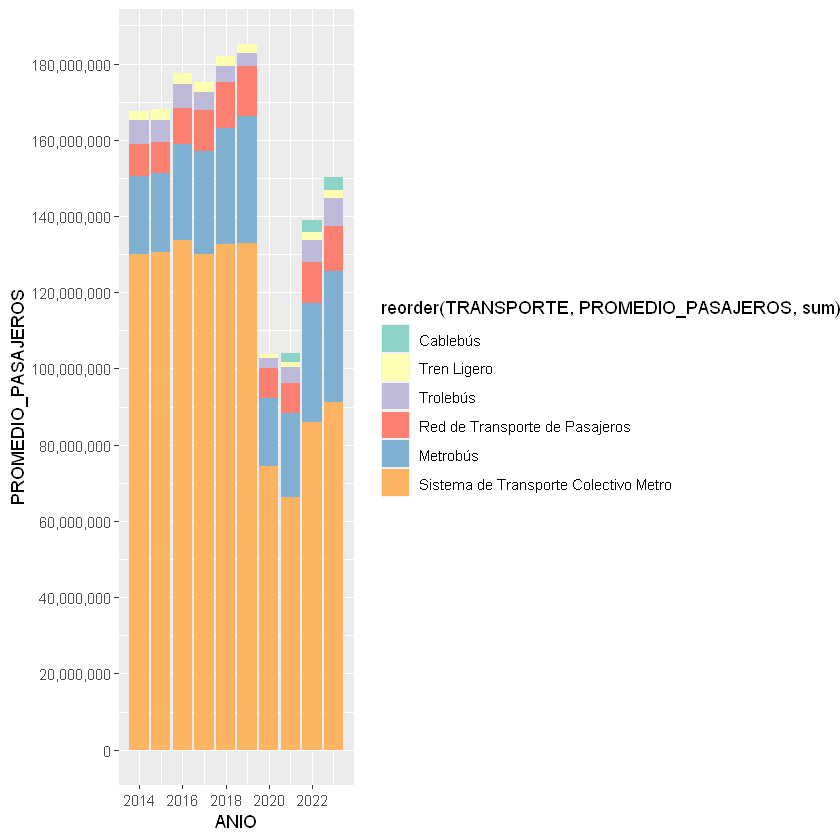

In [18]:
dataCDMX %>% 
    filter(VARIABLE=="Pasajeros transportados",ANIO>2023-10) %>%
    group_by(TRANSPORTE,ANIO)%>%
    summarize(PROMEDIO_PASAJEROS=mean(VALOR)) %>%
    ggplot(mapping =aes(x=ANIO,y=PROMEDIO_PASAJEROS, fill=reorder(TRANSPORTE,PROMEDIO_PASAJEROS,sum))) +
    geom_col(position="stack") +
    scale_y_continuous(labels=comma,n.breaks=10) +
    scale_x_continuous(breaks=c(2014,2016,2018,2020,2022))+
    scale_fill_brewer(palette="Set3")

### Unidades disponibles

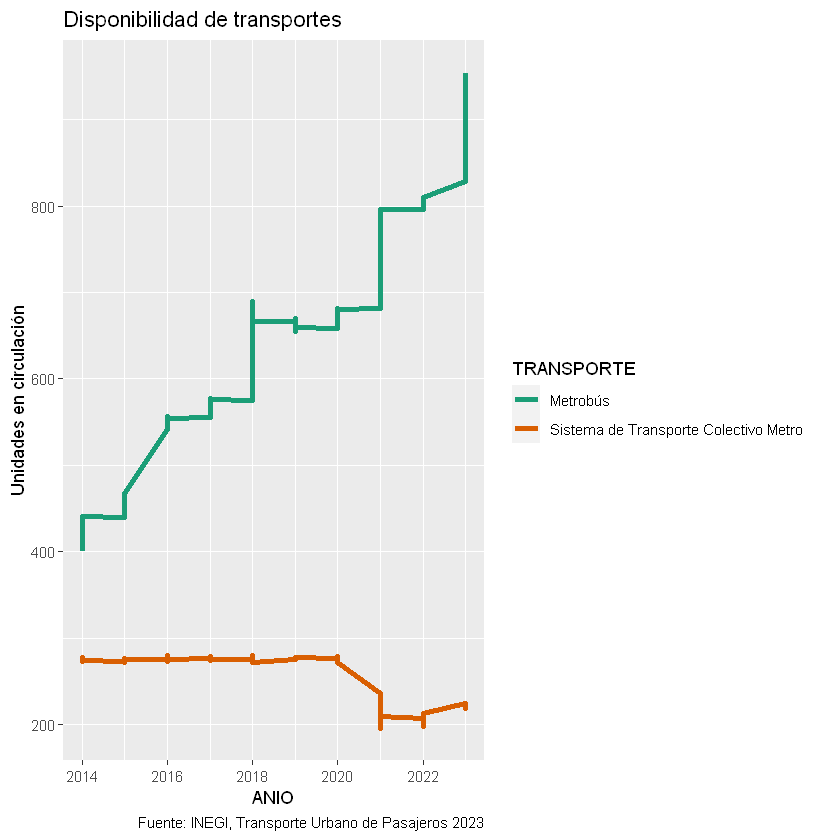

In [19]:
dataCDMX %>%
    filter(VARIABLE=="Trenes en servicio"|VARIABLE=="Unidades en existencia",ANIO>2023-10)%>%
    ggplot(mapping=aes(x=ANIO,y=VALOR,color=TRANSPORTE)) +
    geom_line(size=1.5) +
    labs(title="Disponibilidad de transportes",
    caption="Fuente: INEGI, Transporte Urbano de Pasajeros 2023",
    y="Unidades en circulación") +
    scale_color_brewer(palette="Dark2")

### Rutas de metrobús

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


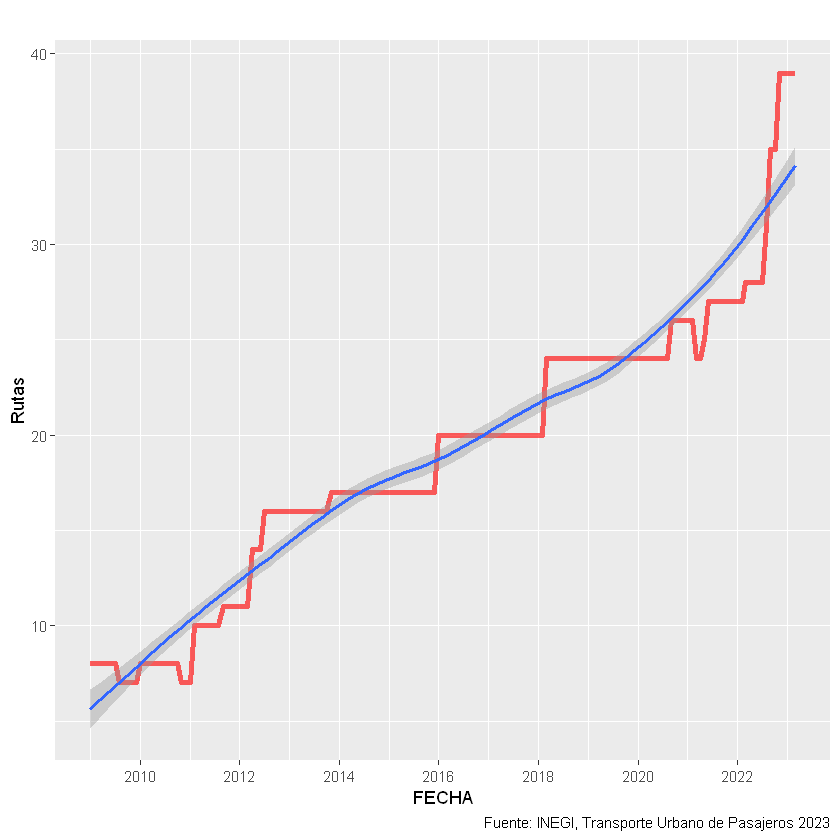

In [20]:
dataCDMX %>%
    filter(VARIABLE=="Rutas",TRANSPORTE=="Metrobús",ANIO>2023-15)%>%
    ggplot(mapping=aes(x=FECHA,y=VALOR))+
    geom_line(size=1.5,colour="#ff0000a0") +
    geom_smooth() +
    labs(title="",
    caption="Fuente: INEGI, Transporte Urbano de Pasajeros 2023",
    y="Rutas") +
    scale_x_date(breaks="2 years",labels =date_format("20%y"))

### KM Recorridos por Metro/Metrobús

`summarise()` has grouped output by 'TRANSPORTE'. You can override using the
`.groups` argument.


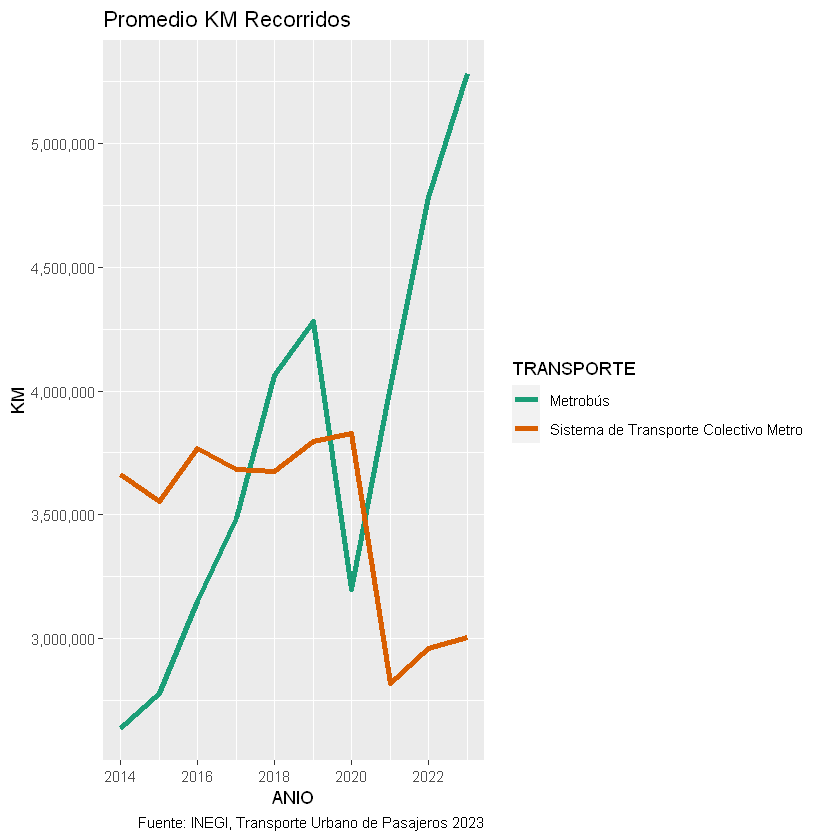

In [21]:
dataCDMX %>%
    filter(VARIABLE=="Kilómetros recorridos",TRANSPORTE=="Metrobús"|TRANSPORTE=="Sistema de Transporte Colectivo Metro",ANIO>2023-10)%>%
    group_by(TRANSPORTE,ANIO) %>%
    summarize(PROMEDIO_KM=mean(VALOR)) %>%
    ggplot(mapping=aes(x=ANIO,y=PROMEDIO_KM,color=TRANSPORTE)) +
    geom_line(size=1.5) +
    labs(title="Promedio KM Recorridos",
    caption="Fuente: INEGI, Transporte Urbano de Pasajeros 2023",
    y="KM") +
    scale_color_brewer(palette="Dark2") +
    scale_y_continuous(labels=comma,n.breaks=10)